In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("waterquality_ammonia.csv")

In [57]:
df.head()

,SAMPLE_DATE,DETERMINAND_LABEL,RESULT
0,04-01-2000,Ammonia(N),10.40
1,28-06-2000,Ammonia(N),6.22
2,15-11-2000,Ammonia(N),3.58
3,17-07-2000,Ammonia(N),34.80
4,24-01-2000,Ammonia(N),0.03


In [59]:
df1 = df.reset_index()['RESULT']

In [60]:
df1.describe()

count    1525.000000
mean        1.209251
std         5.762385
min         0.009200
25%         0.030000
50%         0.047000
75%         0.228000
max        68.500000
Name: RESULT, dtype: float64

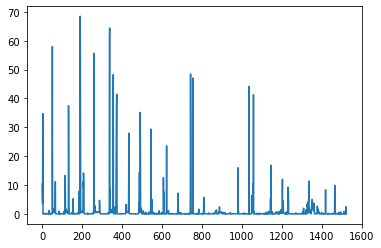

In [61]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [63]:
print(df1)

[[0.15171089]
 [0.09068079]
 [0.05213547]
 ...
 [0.00030369]
 [0.00030369]
 [0.00329679]]


In [64]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [65]:
training_size,test_size

(991, 534)

In [66]:
train_data

array([[1.51710887e-01],
       [9.06807922e-02],
       [5.21354693e-02],
       [5.07963113e-01],
       [3.03690423e-04],
       [3.03690423e-04],
       [3.03690423e-04],
       [3.41359715e-03],
       [3.03690423e-04],
       [3.03690423e-04],
       [6.24901447e-04],
       [3.32891425e-04],
       [3.32891425e-04],
       [3.03690423e-04],
       [5.22697939e-04],
       [6.97903952e-04],
       [3.03690423e-04],
       [3.03690423e-04],
       [3.03690423e-04],
       [3.09238613e-03],
       [3.03690423e-04],
       [5.95700444e-04],
       [3.91293429e-04],
       [3.76692928e-04],
       [3.03690423e-04],
       [1.29652450e-03],
       [1.48633101e-03],
       [5.95700444e-04],
       [3.03690423e-04],
       [3.03690423e-04],
       [3.03690423e-04],
       [4.88824776e-03],
       [3.03690423e-04],
       [6.68702950e-04],
       [3.03690423e-04],
       [1.75322817e-02],
       [1.53013251e-03],
       [5.51898941e-04],
       [3.03690423e-04],
       [6.83303451e-04],


In [67]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [68]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [69]:
print(X_train.shape), print(y_train.shape)

(890, 100)
(890,)


(None, None)

In [70]:
print(X_test.shape), print(ytest.shape)

(433, 100)
(433,)


(None, None)

In [71]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [72]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [73]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 15s 277ms/step - loss: 0.0101 - val_loss: 6.0774e-04
Epoch 2/100
14/14 [==============================] - 2s 162ms/step - loss: 0.0098 - val_loss: 9.3564e-04
Epoch 3/100
14/14 [==============================] - 2s 157ms/step - loss: 0.0098 - val_loss: 7.8140e-04
Epoch 4/100
14/14 [==============================] - 2s 152ms/step - loss: 0.0099 - val_loss: 6.1432e-04
Epoch 5/100
14/14 [==============================] - 2s 154ms/step - loss: 0.0097 - val_loss: 9.0646e-04
Epoch 6/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0097 - val_loss: 6.7002e-04
Epoch 7/100
14/14 [==============================] - 2s 150ms/step - loss: 0.0098 - val_loss: 7.6288e-04
Epoch 8/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0097 - val_loss: 6.5864e-04
Epoch 9/100
14/14 [==============================] - 2s 152ms/step - loss: 0.0096 - val_loss: 6.8895e-04
Epoch 10/100
14/14 [==============================] - 

14/14 [==============================] - 2s 150ms/step - loss: 0.0060 - val_loss: 6.6770e-04
Epoch 79/100
14/14 [==============================] - 2s 150ms/step - loss: 0.0060 - val_loss: 6.8697e-04
Epoch 80/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0059 - val_loss: 6.7015e-04
Epoch 81/100
14/14 [==============================] - 2s 157ms/step - loss: 0.0058 - val_loss: 5.8827e-04
Epoch 82/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0058 - val_loss: 5.6719e-04
Epoch 83/100
14/14 [==============================] - 2s 148ms/step - loss: 0.0058 - val_loss: 6.4544e-04
Epoch 84/100
14/14 [==============================] - 2s 148ms/step - loss: 0.0059 - val_loss: 5.5600e-04
Epoch 85/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0060 - val_loss: 5.3966e-04
Epoch 86/100
14/14 [==============================] - 2s 154ms/step - loss: 0.0061 - val_loss: 6.3839e-04
Epoch 87/100
14/14 [==============================] - 2s 15

In [76]:
import tensorflow as tf

In [77]:
tf.__version__

'2.7.0'

In [78]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [79]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [80]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4.638955663738739

In [81]:
math.sqrt(mean_squared_error(ytest,test_predict))

1.2179231311534764

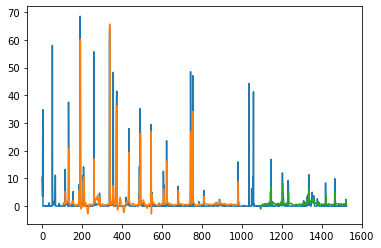

In [82]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [83]:
len(test_data)

534

In [84]:
x_input=test_data[434:].reshape(1,-1)
x_input.shape

(1, 100)

In [86]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [87]:
temp_input

[0.0003036904226553055,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0011359189847395563,
 0.0022455570675185576,
 0.0003620924270120951,
 0.0006395019477068453,
 0.0005226979389932662,
 0.003106986631781203,
 0.0003620924270120951,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0008001074596880165,
 0.0004058939302796872,
 0.000887710466223201,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0003912934291904898,
 0.0003036904226553055,
 0.0011505194858287535,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0006249014466176479,
 0.0008293084618664113,
 0.0032383911415839795,
 0.0003036904226553055,
 0.0004350949324580819,
 0.0003036904226553055,
 0.0003036904226553055,
 0.0005080974379040688,
 0.0007855069585988191,
 0.0009023109673123981,
 0.015050196522744662,
 0.14470264619481743,
 0.02833665251391428,

In [88]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01234251]
101
1 day input [0.00030369 0.00030369 0.00113592 0.00224556 0.00036209 0.0006395
 0.0005227  0.00310699 0.00036209 0.00030369 0.00030369 0.00080011
 0.00040589 0.00088771 0.00030369 0.00030369 0.00030369 0.00030369
 0.00030369 0.00039129 0.00030369 0.00115052 0.00030369 0.00030369
 0.00030369 0.00030369 0.00030369 0.00030369 0.0006249  0.00082931
 0.00323839 0.00030369 0.00043509 0.00030369 0.00030369 0.0005081
 0.00078551 0.00090231 0.0150502  0.14470265 0.02833665 0.03023472
 0.00030369 0.00161774 0.00039129 0.0004935  0.00077091 0.00196815
 0.00135493 0.0005227  0.00096071 0.00030369 0.0006103  0.00037669
 0.0004643  0.00031829 0.0006833  0.00030369 0.00672791 0.0007271
 0.00195355 0.00040589 0.00096071 0.00093151 0.00236236 0.00030369
 0.00030369 0.00036209 0.01042184 0.0005519  0.00030369 0.00030369
 0.00080011 0.00081471 0.00040589 0.00158853 0.00030369 0.00030369
 0.00030369 0.0006541  0.00030369 0.00030369 0.00030369 0.00030369
 0.00030369 0.0122615  0.00370561 0.

10 day output [[0.01946528]]
11 day input [0.00030369 0.00080011 0.00040589 0.00088771 0.00030369 0.00030369
 0.00030369 0.00030369 0.00030369 0.00039129 0.00030369 0.00115052
 0.00030369 0.00030369 0.00030369 0.00030369 0.00030369 0.00030369
 0.0006249  0.00082931 0.00323839 0.00030369 0.00043509 0.00030369
 0.00030369 0.0005081  0.00078551 0.00090231 0.0150502  0.14470265
 0.02833665 0.03023472 0.00030369 0.00161774 0.00039129 0.0004935
 0.00077091 0.00196815 0.00135493 0.0005227  0.00096071 0.00030369
 0.0006103  0.00037669 0.0004643  0.00031829 0.0006833  0.00030369
 0.00672791 0.0007271  0.00195355 0.00040589 0.00096071 0.00093151
 0.00236236 0.00030369 0.00030369 0.00036209 0.01042184 0.0005519
 0.00030369 0.00030369 0.00080011 0.00081471 0.00040589 0.00158853
 0.00030369 0.00030369 0.00030369 0.0006541  0.00030369 0.00030369
 0.00030369 0.00030369 0.00030369 0.0122615  0.00370561 0.00030369
 0.00034749 0.00109212 0.00080011 0.00236236 0.00030369 0.00110672
 0.00030369 0.03636693

19 day output [[0.0280952]]
20 day input [0.00039129 0.00030369 0.00115052 0.00030369 0.00030369 0.00030369
 0.00030369 0.00030369 0.00030369 0.0006249  0.00082931 0.00323839
 0.00030369 0.00043509 0.00030369 0.00030369 0.0005081  0.00078551
 0.00090231 0.0150502  0.14470265 0.02833665 0.03023472 0.00030369
 0.00161774 0.00039129 0.0004935  0.00077091 0.00196815 0.00135493
 0.0005227  0.00096071 0.00030369 0.0006103  0.00037669 0.0004643
 0.00031829 0.0006833  0.00030369 0.00672791 0.0007271  0.00195355
 0.00040589 0.00096071 0.00093151 0.00236236 0.00030369 0.00030369
 0.00036209 0.01042184 0.0005519  0.00030369 0.00030369 0.00080011
 0.00081471 0.00040589 0.00158853 0.00030369 0.00030369 0.00030369
 0.0006541  0.00030369 0.00030369 0.00030369 0.00030369 0.00030369
 0.0122615  0.00370561 0.00030369 0.00034749 0.00109212 0.00080011
 0.00236236 0.00030369 0.00110672 0.00030369 0.03636693 0.00030369
 0.00030369 0.00329679 0.01234251 0.01651059 0.01830653 0.01904542
 0.01927458 0.01925964

27 day output [[0.02234712]]
28 day input [0.00030369 0.0006249  0.00082931 0.00323839 0.00030369 0.00043509
 0.00030369 0.00030369 0.0005081  0.00078551 0.00090231 0.0150502
 0.14470265 0.02833665 0.03023472 0.00030369 0.00161774 0.00039129
 0.0004935  0.00077091 0.00196815 0.00135493 0.0005227  0.00096071
 0.00030369 0.0006103  0.00037669 0.0004643  0.00031829 0.0006833
 0.00030369 0.00672791 0.0007271  0.00195355 0.00040589 0.00096071
 0.00093151 0.00236236 0.00030369 0.00030369 0.00036209 0.01042184
 0.0005519  0.00030369 0.00030369 0.00080011 0.00081471 0.00040589
 0.00158853 0.00030369 0.00030369 0.00030369 0.0006541  0.00030369
 0.00030369 0.00030369 0.00030369 0.00030369 0.0122615  0.00370561
 0.00030369 0.00034749 0.00109212 0.00080011 0.00236236 0.00030369
 0.00110672 0.00030369 0.03636693 0.00030369 0.00030369 0.00329679
 0.01234251 0.01651059 0.01830653 0.01904542 0.01927458 0.01925964
 0.01915537 0.01905641 0.01903802 0.0191533  0.01946528 0.02000662
 0.02079204 0.02180865

In [89]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [90]:
import matplotlib.pyplot as plt

In [91]:
len(df1)

1525

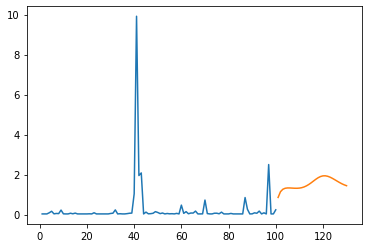

In [92]:
plt.plot(day_new,scaler.inverse_transform(df1[1425:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

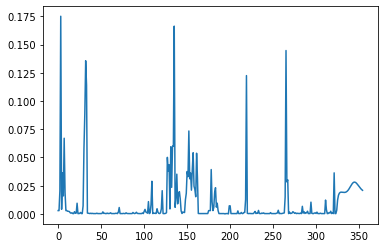

In [93]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [94]:
df3=scaler.inverse_transform(df3).tolist()

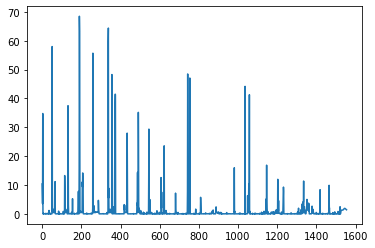

In [95]:
plt.plot(df3)